<a href="https://colab.research.google.com/github/Aytsan11/AI-DL/blob/main/Image_%D0%9B%D0%A04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras

In [2]:
!unzip '/content/archive.zip'

Archive:  /content/archive.zip
  inflating: images/cat/cat_1.jpg    
  inflating: images/cat/cat_10.jpg   
  inflating: images/cat/cat_100.jpg  
  inflating: images/cat/cat_101.jpg  
  inflating: images/cat/cat_102.jpg  
  inflating: images/cat/cat_103.jpg  
  inflating: images/cat/cat_104.jpg  
  inflating: images/cat/cat_105.jpg  
  inflating: images/cat/cat_106.jpg  
  inflating: images/cat/cat_107.jpg  
  inflating: images/cat/cat_108.jpg  
  inflating: images/cat/cat_109.jpeg  
  inflating: images/cat/cat_11.jpg   
  inflating: images/cat/cat_110.jpeg  
  inflating: images/cat/cat_111.jpeg  
  inflating: images/cat/cat_112.jpg  
  inflating: images/cat/cat_113.jpg  
  inflating: images/cat/cat_114.jpg  
  inflating: images/cat/cat_115.jpg  
  inflating: images/cat/cat_116.jpg  
  inflating: images/cat/cat_117.jpg  
  inflating: images/cat/cat_118.jpg  
  inflating: images/cat/cat_119.jpg  
  inflating: images/cat/cat_12.jpg   
  inflating: images/cat/cat_120.jpg  
  inflating: ima

In [3]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
import shutil
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
image_path = '/content/images'
train = '/content/train'
test = '/content/test'
valid = '/content/valid'

In [5]:
split_train = 0.9
split_valid = 0.05

classes = ['cat', 'loaf']

for i in classes:
    os.makedirs(os.path.join(train, i), exist_ok=True)
    os.makedirs(os.path.join(test, i), exist_ok=True)
    os.makedirs(os.path.join(valid, i), exist_ok=True)

    files = os.listdir(os.path.join(image_path, i))
    files = [f for f in files if os.path.isfile(os.path.join(image_path, i, f))]

    random.shuffle(files)

    train_idx = int(len(files) * split_train)
    valid_idx = int(len(files) * (split_train + split_valid))

    train_files = files[:train_idx]
    valid_files = files[train_idx:valid_idx]
    test_files = files[valid_idx:]

    for file in train_files:
        shutil.copy(os.path.join(image_path, i, file), os.path.join(train, i, file))
    for file in valid_files:
        shutil.copy(os.path.join(image_path, i, file), os.path.join(valid, i, file))
    for file in test_files:
        shutil.copy(os.path.join(image_path, i, file), os.path.join(test, i, file))

In [6]:
tf.random.set_seed(11)
datagen = ImageDataGenerator(rescale=1/255)

augment = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255,
)

In [7]:
class_mode = 'binary'

train_data = augment.flow_from_directory(train, batch_size=20, target_size=(100, 100), class_mode=class_mode, seed=11)
test_data = datagen.flow_from_directory(test, batch_size=3, target_size=(100, 100), class_mode=class_mode, seed=11)
valid_data = datagen.flow_from_directory(valid, batch_size=3, target_size=(100, 100), class_mode=class_mode, seed=11)

Found 580 images belonging to 2 classes.
Found 34 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [8]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu", input_shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
epochs = 25
history_1 = model_1.fit(train_data, epochs=epochs, validation_data=valid_data)
acc = model_1.evaluate(test_data)
print(np.array(acc)[1].round(2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 269ms/step - accuracy: 0.4921 - loss: 0.7008 - val_accuracy: 0.5000 - val_loss: 0.6953
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - accuracy: 0.5616 - loss: 0.6762 - val_accuracy: 0.5000 - val_loss: 0.7121
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - accuracy: 0.5555 - loss: 0.6777 - val_accuracy: 0.5312 - val_loss: 0.6958
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 279ms/step - accuracy: 0.6318 - loss: 0.6443 - val_accuracy: 0.4688 - val_loss: 0.6801
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - accuracy: 0.6622 - loss: 0.6377 - val_accuracy: 0.5312 - val_loss: 0.6800
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step - accuracy: 0.6575 - loss: 0.6208 - val_accuracy: 0.5312 - val_loss: 0.6740
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step - accuracy: 0.6242 - loss: 0.6628 - val_accuracy: 0.6250 - val_loss: 0.6721
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - accuracy: 0.6516 - loss: 0.6318 - val_accuracy: 

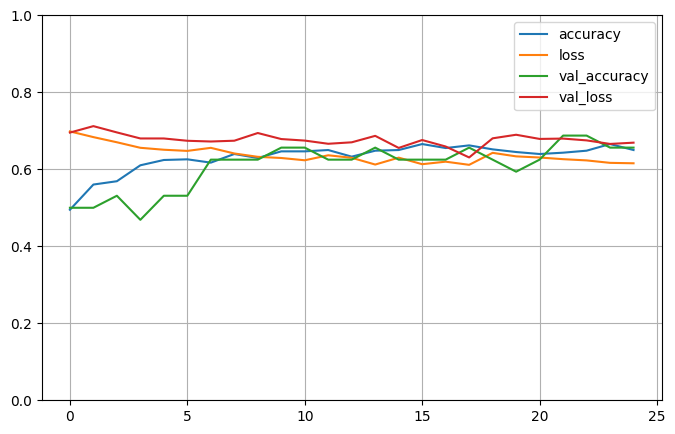

In [9]:
pd.DataFrame(history_1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


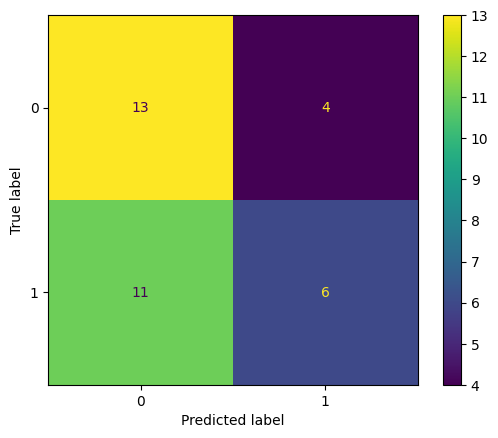

              precision    recall  f1-score   support

           0       0.54      0.76      0.63        17
           1       0.60      0.35      0.44        17

    accuracy                           0.56        34
   macro avg       0.57      0.56      0.54        34
weighted avg       0.57      0.56      0.54        34



In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


y_true = test_data.classes
y_pred_probs = model_1.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

#матрица путаницы
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_true, y_pred))

In [11]:
model_2 = tf.keras.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
epochs = 70
history_2 = model_2.fit(train_data, epochs=epochs, validation_data=valid_data)
acc = model_2.evaluate(test_data)
print(np.array(acc)[1].round(2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 602ms/step - accuracy: 0.4604 - loss: 0.7665 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 732ms/step - accuracy: 0.4927 - loss: 0.6929 - val_accuracy: 0.5312 - val_loss: 0.6944
Epoch 3/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 643ms/step - accuracy: 0.5504 - loss: 0.6881 - val_accuracy: 0.5625 - val_loss: 0.6884
Epoch 4/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 602ms/step - accuracy: 0.5663 - loss: 0.6785 - val_accuracy: 0.6250 - val_loss: 0.6844
Epoch 5/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 563ms/step - accuracy: 0.6077 - loss: 0.6780 - val_accuracy: 0.6875 - val_loss: 0.6743
Epoch 6/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 555ms/step - accuracy: 0.6500 - loss: 0.6457 - val_accuracy: 0.5938 - val_loss: 0.6682
Epoch 7/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 608ms/step - accuracy: 0.6499 - loss: 0.6358 - val_accuracy: 0.5625 - val_loss: 0.6983
Epoch 8/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 544ms/step - accuracy: 0.6650 - loss: 0.6357 - val_accu

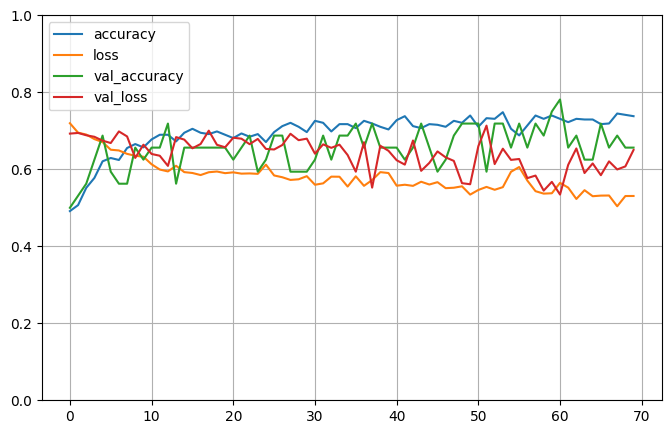

In [12]:
pd.DataFrame(history_2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


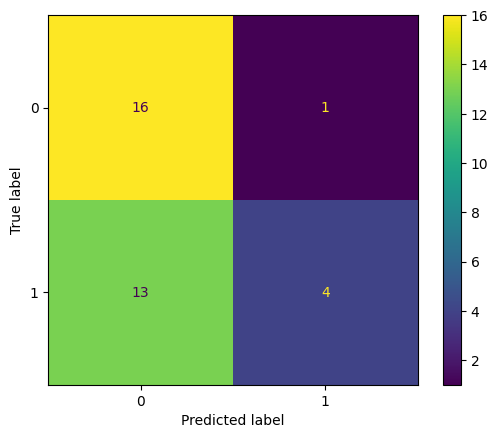

              precision    recall  f1-score   support

           0       0.55      0.94      0.70        17
           1       0.80      0.24      0.36        17

    accuracy                           0.59        34
   macro avg       0.68      0.59      0.53        34
weighted avg       0.68      0.59      0.53        34



In [13]:
y_true = test_data.classes
y_pred_probs = model_2.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

#матрица путаницы
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_true, y_pred))

In [14]:
model_3 = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size = 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
epochs = 35
history_3 = model_3.fit(train_data, epochs=epochs, validation_data=valid_data)
acc = model_3.evaluate(test_data)
print(np.array(acc)[1].round(2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 620ms/step - accuracy: 0.5052 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 2/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 615ms/step - accuracy: 0.5251 - loss: 0.6908 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 607ms/step - accuracy: 0.5228 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6910
Epoch 4/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 639ms/step - accuracy: 0.4921 - loss: 0.6855 - val_accuracy: 0.5625 - val_loss: 0.6642
Epoch 5/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 590ms/step - accuracy: 0.6282 - loss: 0.6792 - val_accuracy: 0.6875 - val_loss: 0.6808
Epoch 6/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 602ms/step - accuracy: 0.6249 - loss: 0.6699 - val_accuracy: 0.5938 - val_loss: 0.6742
Epoch 7/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 644ms/step - accuracy: 0.5900 - loss: 0.6849 - val_accuracy: 0.5625 - val_loss: 0.6693
Epoch 8/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 593ms/step - accuracy: 0.6350 - loss: 0.6473 - val_accu

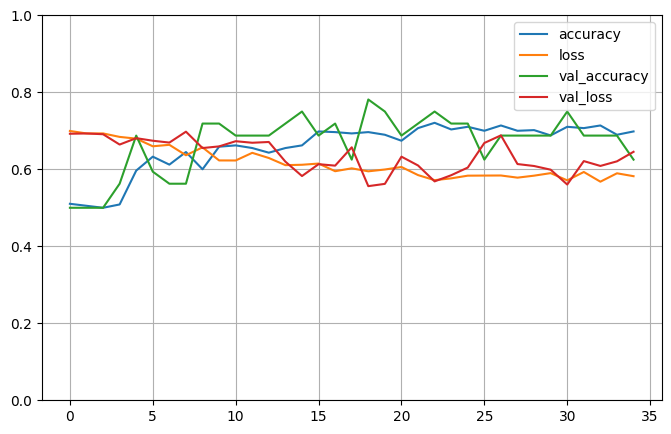

In [15]:
pd.DataFrame(history_3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


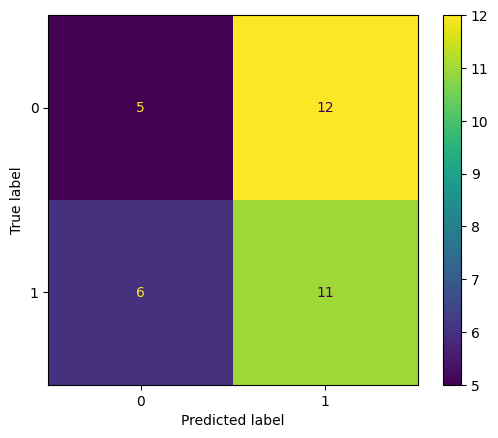

              precision    recall  f1-score   support

           0       0.45      0.29      0.36        17
           1       0.48      0.65      0.55        17

    accuracy                           0.47        34
   macro avg       0.47      0.47      0.45        34
weighted avg       0.47      0.47      0.45        34



In [16]:
y_true = test_data.classes
y_pred_probs = model_3.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

#матрица путаницы
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_true, y_pred))